<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import matplotlib as plt
%matplotlib inline

import pandas as pd

%pip install seaborn
import seaborn as sns

<ipython-input-1-a23775b73851>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


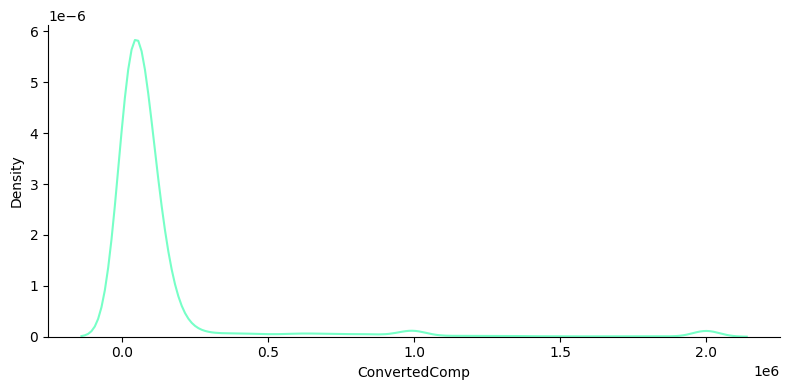

In [7]:
sns.displot(df['ConvertedComp'], color="#77ffc7", kind="kde", height=4, aspect=2)

Plot the histogram for the column `ConvertedComp`.


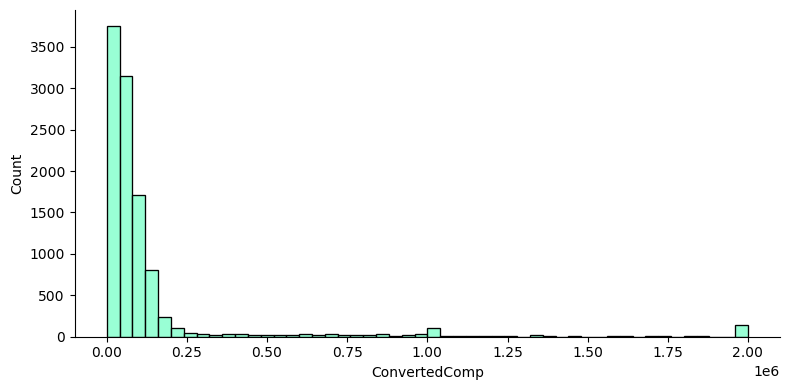

In [8]:
sns.displot(df['ConvertedComp'], color="#77ffc7", bins=50, height=4, aspect=2)

What is the median of the column `ConvertedComp`?


In [9]:
df['ConvertedComp'].median()

57745.0

In [24]:
df['Age'].median()

29.0

How many responders identified themselves only as a **Man**?


In [10]:
df['Gender'].unique()

array(['Man', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming', nan,
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [11]:
df.groupby('Gender')[['Respondent', 'Age']].count()

,Respondent,Age
Gender,,
Man,10480,10214
"Man;Non-binary, genderqueer, or gender non-conforming",26,24
"Non-binary, genderqueer, or gender non-conforming",63,62
Woman,731,719
Woman;Man,9,8
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",2,2
"Woman;Non-binary, genderqueer, or gender non-conforming",14,14


In [12]:
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

In [13]:
len(df[df['Gender'] == "Man"].index)

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
df[df['Gender'] == "Woman"]['ConvertedComp'].median()


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


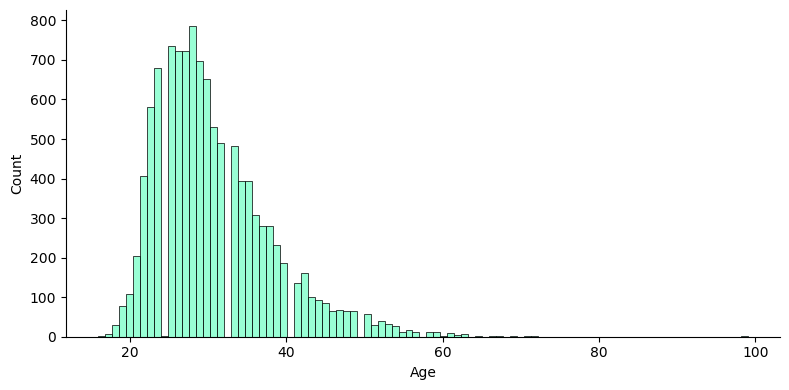

In [25]:
sns.displot(df['Age'], color="#77ffc7", height=4, aspect=2) #, binwidth=1

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

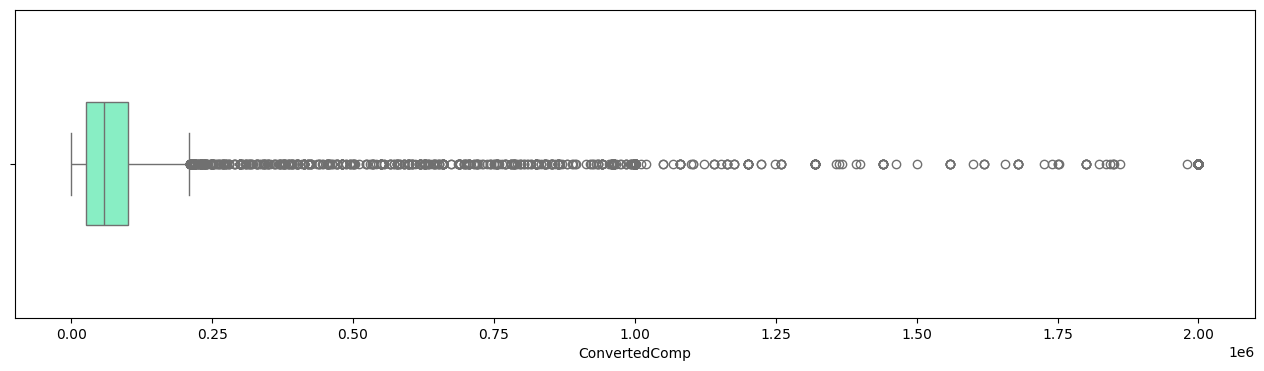

In [17]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16,4))
sns.boxplot(df['ConvertedComp'], orient="h", color="#77ffc7", widths=0.4)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [19]:
LB = Q1 - ( IQR * 1.5 )
UB = Q3 +  ( IQR * 1.5 )

print( f"Lower Bounds is equal to { LB }" )
print( f"Upper Bounds is equal to { UB }" )

Lower Bounds is equal to -82830.0
Upper Bounds is equal to 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
#df[df['ConvertedComp'] > UB]['Respondent'].count()
len(df[df['ConvertedComp'] > UB].index)

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [21]:
outliers = df[(df['ConvertedComp'] < LB) | (df['ConvertedComp'] > UB)].index
df_wout = df.drop(outliers)
df_wout.shape

(10519, 85)

In [26]:
df_wout['ConvertedComp'].median()

52704.0

In [27]:
df_wout['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

In [23]:
df.select_dtypes(include='number').corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
